# Análisis exploratorio de datos
Insturcciones:
EDA (análisis exploratorio de datos): previo a la fase de modelado, deberá realizarse un
EDA sobre el dataset seleccionado. Este debe cumplir con:

a) Plantear tres (3) preguntas de su interés. Estas preguntas deben ser “preguntas
complejas”, utilizar el mismo criterio aplicado al Proyecto 1 del curso.

b) En un único notebook, definir dichas preguntas y proceder a encontrar la
respuesta utilizando las herramientas de manipulación y análisis de datos vistas
en clase.

c) Trabajar de forma ordenada el notebook, utilizando una combinación de celdas
de código y celdas de markdown.

d) Una de las preguntas debe tener una respuesta gráfica, acompañada de su
interpretación correspondiente.

e) Este notebook debe subirse al repositorio con el nombre eda.ipynb y encontrarse
en el primer nivel de la estructura de archivos del repositorio. Asegurarse que el
notebook pueda resetearse y volverse a ejecutar (run all) sin ningún
inconveniente.

*Exploración incial de la data antes de las preguntas...*

- Cargar el data set y revisar su tamaño y estructura

In [12]:
import pandas as pd

df = pd.read_csv('Databases/games.csv')  # ajustá el path si es diferente

print(f"Cantidad de observaciones: {df.shape[0]}")
print(f"Cantidad de columnas (features): {df.shape[1]}")

# Información general: tipos de dato, columnas, nulls, etc.
df.info()


Cantidad de observaciones: 111452
Cantidad de columnas (features): 39
<class 'pandas.core.frame.DataFrame'>
Index: 111452 entries, 20200 to 3183790
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AppID                       111446 non-null  object 
 1   Name                        111452 non-null  object 
 2   Release date                111452 non-null  object 
 3   Estimated owners            111452 non-null  int64  
 4   Peak CCU                    111452 non-null  int64  
 5   Required age                111452 non-null  float64
 6   Price                       111452 non-null  int64  
 7   DiscountDLC count           111452 non-null  int64  
 8   About the game              104969 non-null  object 
 9   Supported languages         111452 non-null  object 
 10  Full audio languages        111452 non-null  object 
 11  Reviews                     10624 non-null   object 
 12  He

- Resumen estadístico de las columnas numéricas

In [10]:
# Estadísticas descriptivas (solo columnas numéricas)
df.describe()


,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,1.114520e+05,111452.000000,111452.000000,111452.000000,111452.000000,111452.000000,111452.000000,1.114520e+05,111452.000000,44.000000,111452.000000,1.114520e+05,111452.000000,111452.000000,111452.000000,111452.000000
mean,1.777215e+02,0.254208,7.061568,0.464209,0.449530,2.623354,0.030408,7.543525e+02,125.859177,98.909091,17.511144,6.163715e+02,81.247290,9.174954,72.651330,9.891038
std,8.390462e+03,2.035653,12.563246,3.503658,12.006677,13.736245,1.565136,2.139410e+04,4002.844431,0.857747,150.139008,1.573854e+04,999.935906,168.201030,1321.333137,183.232812
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,0.000000,3.990000,0.000000,0.000000,0.000000,0.000000,3.000000e+00,1.000000,99.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.000000e+00,0.000000,9.990000,0.000000,0.000000,0.000000,0.000000,2.900000e+01,8.000000,100.000000,17.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,1.311366e+06,21.000000,999.980000,92.000000,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,100.000000,9821.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000


In [13]:
print(df.columns.tolist())


['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU', 'Required age', 'Price', 'DiscountDLC count', 'About the game', 'Supported languages', 'Full audio languages', 'Reviews', 'Header image', 'Website', 'Support url', 'Support email', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score', 'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations', 'Notes', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks', 'Developers', 'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies']


KeyError: 'Peak_CCU'

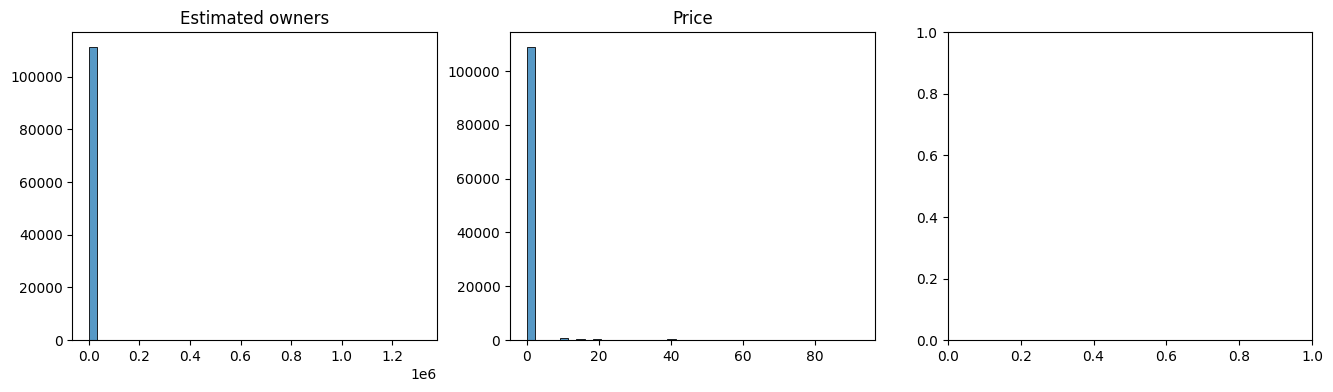

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráficas de variables importantes (sin modificar datos)
plt.figure(figsize=(16,4))

plt.subplot(1, 3, 1)
sns.histplot(df['Estimated owners'], bins=40)
plt.title("Estimated owners")
plt.xlabel("")
plt.ylabel("")

plt.subplot(1, 3, 2)
sns.histplot(df['Price'], bins=40)
plt.title("Price")
plt.xlabel("")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.histplot(df['Peak_CCU'], bins=40)
plt.title("Peak CCU")
plt.xlabel("")
plt.ylabel("")

plt.tight_layout()
plt.show()


## Preguntas de interés

### 1) pregunta 

In [ ]:
#aqui vamos a plantear la primera pregunta

Cantidad de observaciones: 111452
Cantidad de columnas (features): 39


### 2) pregunta 

In [ ]:
#aqui la segunda

### 3) pregunta 

In [ ]:
#y la tercera